In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.tsv", sep="\t", usecols=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'])

In [4]:
#Set dataframe index to datetime type
dt = pd.to_datetime(df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM'])
df.index = pd.DatetimeIndex(dt)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458223 entries, 2017-12-23 15:00:00 to 2017-12-23 15:00:00
Data columns (total 2 columns):
CMPLNT_FR_DT    458223 non-null object
CMPLNT_FR_TM    458223 non-null object
dtypes: object(2)
memory usage: 7.0+ MB


In [5]:
def process_weekday(dt):
    '''a simple function to parse string time into several components'''
    dt = datetime.strptime(dt, '%m/%d/%Y')
    return dt.strftime("%A")  # you can modify here to get other time components

def process_hour(dt):
    '''a simple function to parse string time into several components'''
    dt = datetime.strptime(dt, '%H:%M:%S')
    return dt.hour  # you can modify here to get other time components

df.CMPLNT_FR_DT = df.CMPLNT_FR_DT.apply(lambda x: process_weekday(x))
df.CMPLNT_FR_TM = df.CMPLNT_FR_TM.apply(lambda x: process_hour(x))


In [6]:
df['CMPLNT_FR_DT'] = pd.Categorical(df['CMPLNT_FR_DT'])
df['CMPLNT_FR_TM'] = pd.Categorical(df['CMPLNT_FR_TM'])

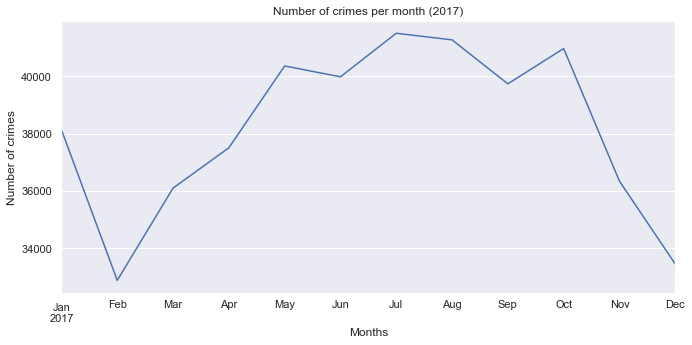

In [36]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

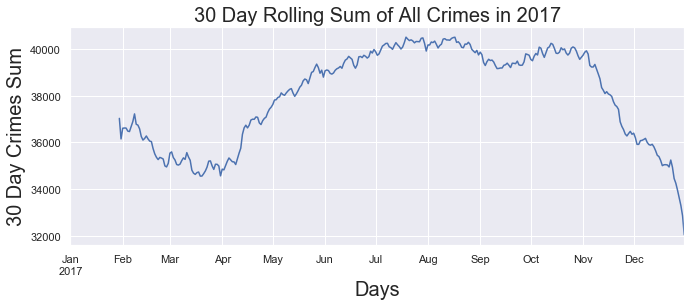

In [10]:
#Plot 30 day rolling sum of crimes
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(30).sum().plot()
plt.title('30 Day Rolling Sum of All Crimes in 2017', fontsize='20')
plt.ylabel('30 Day Crimes Sum', fontsize='20')
plt.xlabel('Days', fontsize='20')
plt.show()

In [26]:
#plt.pcolor(nnn, cmap='Reds')
#plt.colorbar()
#plt.show()
nnn.CMPLNT_FR_TM.value_counts()

17    27824
18    27520
15    26953
16    26774
19    25766
20    25048
12    25032
14    24590
21    22479
13    21928
0     21416
22    20840
23    19102
11    18935
10    18342
9     17105
8     15999
1     15241
2     12667
3     10685
7     10072
4      9569
6      7387
5      6949
Name: CMPLNT_FR_TM, dtype: int64